<a href="https://colab.research.google.com/github/nestorm94/HPC-PARCIAL3/blob/main/parcial3_Nestor_Morales_hpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Jhon Corredor Franco.
<br>
<i><b>Asignatura:</b></i> Métricas de rendimiento HPC
<br>
<i><b>Estudiante:</b></i> Nestor Ivan Morales Calixto
<br>
<i><b>Tema:</b></i> Tercer Parcial. Validación regresión logística con datasets encontrados.
<br>
<br>
22/11/2022
<br>
</FONT>
</div>

Se importan las bibliotecas necesarias para el desarrollo del trabajo.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn import metrics 

El dataset encontrado para la realizacion de este parcial corresponde al de Wine Quality Classification de la pagina web Kaggle.

In [ ]:
#Se sube los datos de entrada y se asignan las variables del dataframe(df) Wine Quality desde github
df = pd.read_csv('https://raw.githubusercontent.com/nestorm94/HPC-PARCIAL3/main/Dataset/wine.csv', sep = ',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


En la siguiente descripción se muestra las medias de las 12 columnas y de igual manera sus desviaciones estándar.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Debido a que la columna de quality la cual se utilizara principalmente corresponde a un dType object, se ha de realizar modificaciones en la forma de este, debido a que solo posee 2 tipos los cuales corresponde a good o bad, se puede tomar como variable booleana, se procedera a realizar el cambio de manera local en donde good correspondera a 1 y bad a 0.

In [ ]:
#Se sube nuevamente el dataframe con los correspondientes cambios
df = pd.read_csv('https://raw.githubusercontent.com/nestorm94/HPC-PARCIAL3/main/Dataset/wine2.csv', sep = ',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Se vuelve a realizar la descripcion, pero esta vez con la columna de quality

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Observamos que no hay ninguna columna que se pierde y a su vez ninguno de los datos del dataset se pierden.

Se usara la biblioteca Normalize en el dataset para poder normalizar los datos y posterior a esto se sacara la desviacion estandar

In [ ]:
datos = Normalizer().fit_transform(df)
type(datos)

numpy.ndarray

In [ ]:
datos.std()

0.2430307940928617

Se presenta la visualización de cada columna que se encuentra en el dataset

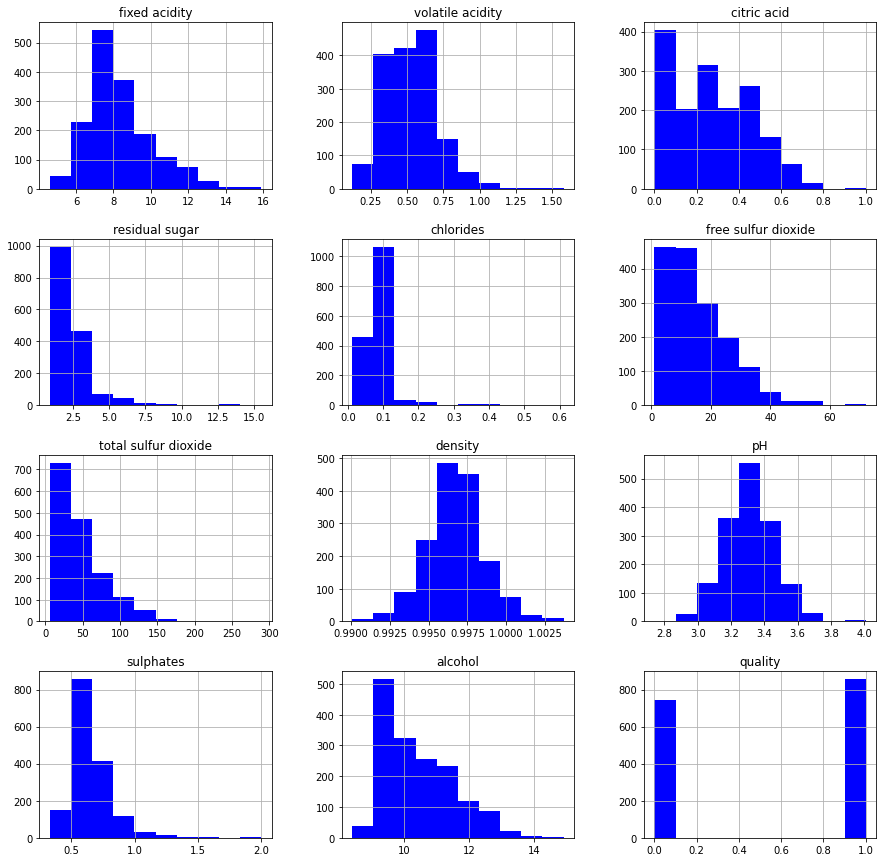

In [ ]:
df.hist(figsize=(15,15), color='#0000ff')
plt.show()


A continuacion se procedera a realizar la regresion logistica del dataset 



1.   **Se realiza la separacion entre las columnas identificadas como dependientes e independientes**



In [ ]:
df_cols = ['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' , 'free sulfur dioxide' ,'total sulfur dioxide' , 'density' , 'pH' , 'sulphates' , 'alcohol']
X = df[df_cols]
y = df.quality 



2.   **Se separan los datos en  los correspondientes train y test con un tamaño del 0.75**



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.75) 

3. **Se crea el modelo de regresion logistica desde sk-learn y se entrena**

In [ ]:
LogisticReg = LogisticRegression()

In [ ]:
LogisticReg.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

4. **Se crea y_predict y se verifica su funcionamiento**

In [ ]:
y_pred=LogisticReg.predict(X_test) 
y_pred

array([0, 1, 1, ..., 1, 1, 1])

Para comprobar el correcto funcionamiento del trabajo, se procedera a usar una metrica de rendimiento de las vistas en clase, para una comparacion mas precisa se utilizara la misma metrica utilizada en C++ la cual es la metrica de Accuracy.

1. Se crea la matriz de confusion tomando y_predict y y_test

In [ ]:
dfMatrix = metrics.confusion_matrix(y_test, y_pred) 
dfMatrix 

array([[352, 232],
       [102, 514]])

Se observa la generacion de la matriz de confusion, se procedera a verificar con la metrica de Accuracy.

2. Se usa metrics para sacar el accuracy score

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7216666666666667




## C++ ##

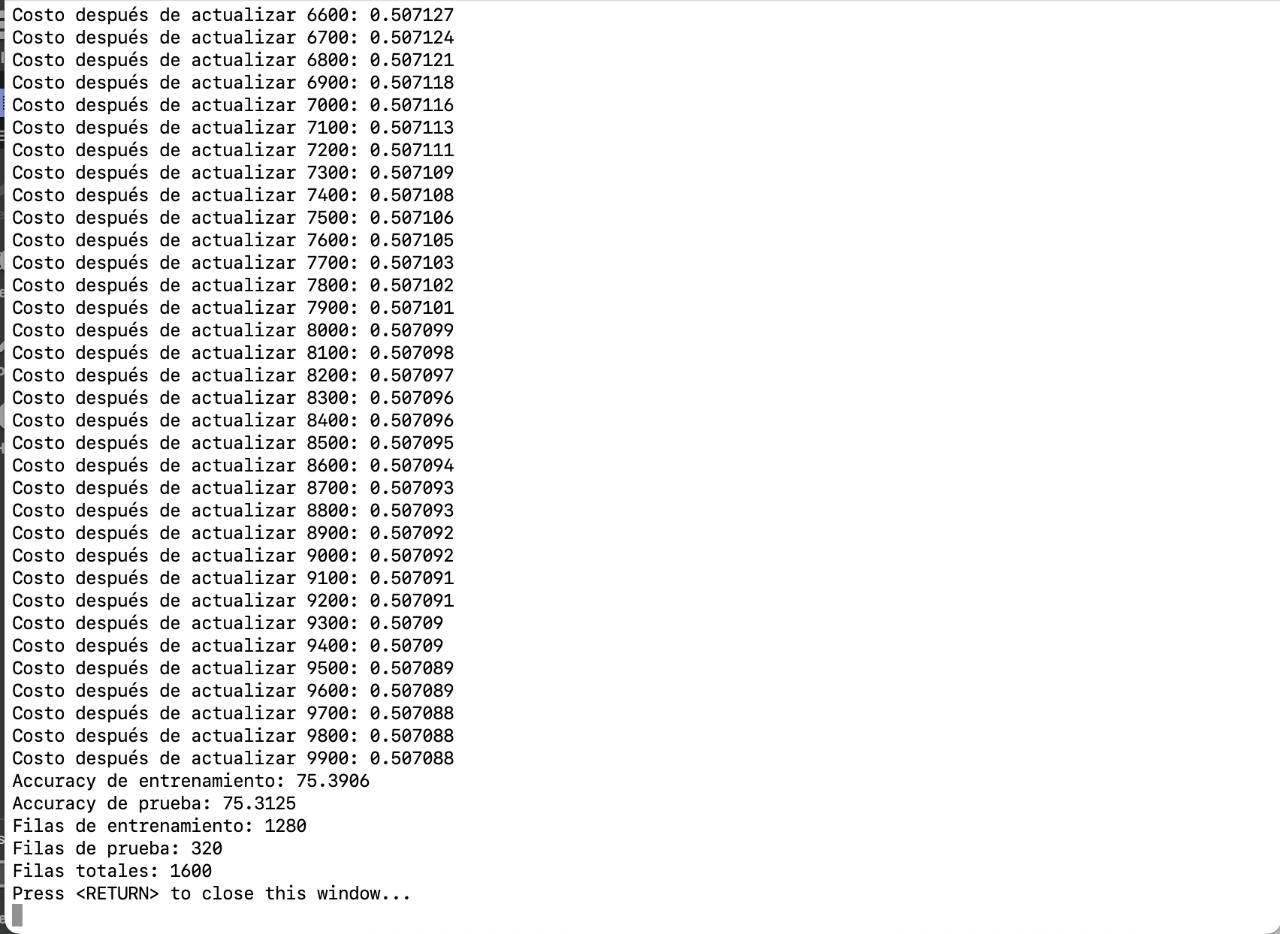

## CONCLUSIONES ##

1. Debido a que ciertos datasets contienen data types de object se es necesario realizar esta modificacion para poder hacer un correcto manejo de el dataset, en este caso la columna necesaria para la realizacion de la regresion logistica poseia object como data type, se fue obligatorio el cambio de los datos de esta columna a booleanos.
2. Al comparar los datos de la grafica de la columna "quality", se observa que hay una mayor cantidad de vino de calidad "good" (buena) comparado a el vino de calidad "bad" (malo).
3. Al comparar la grafica de "alcohol" con el promedio de la columna, se observa que aunque existe una mayor cantidad de valores aproximados a 8, existe una mayor cantidad de valores dispersos en valores mayores a 10.
4. Se visualiza en la grafica "chlorides" que existe una cantidad de datos minuscula que supera el 0.1 permitiendo entender que aquellos vinos tomados en cuenta a la hora de realizar el dataset poseen un chlorido de 0.1 en su mayoria.
5. Se observa en la matriz de confusion que existe una gran cantidad de valores "True" (positive-negative) comparado a valores "False", mostrando que existe una gran cantidad de valores bien categorizados comparados a aquellos que estan mal categorizados.
6. El resultado del accuracy obtenido por python corresponde a 0.7216, significa que el modelo es "bueno" pero podria ser mejor y significa que falla 0.27 de cada 1.
7. Al comparar los resultados de la metrica de rendimiento accuracy en C++ y Python observamos que hay una disparidad de 0.03, significa que aunque hay una disparidad, esta disparidad no difiere mucho entre ambos lenguajes.

## Referencias ##
1. https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
2. https://www.projectpro.io/recipes/perform-logistic-regression-sklearn#mcetoc_1g5o1ob2jj
3. https://www.javatpoint.com/accuracy_score-in-sklearn
4. https://www.geeksforgeeks.org/describe-a-numpy-array-in-python/